Speech Processing Assignment 1<br>
Author : Ankit Kumar Bhakar<br>
Roll No: 22M1077


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython

%matplotlib inline

Question 1

Given the following specification for a single-formant resonator, obtain the transfer function of the filter H(z) from the relation between resonance frequency / bandwidth, and the pole angle / radius. Plot filter magnitude response (dB magnitude versus frequency) and impulse response.<br>


Second order transfer function for each formant frequency is given by:
$$
 H(z) = \frac{k}{(1-re^{j\theta} z^{-1})(1-re^{-j\theta} z^{-1})}
  = \frac{k}{1-2r\cos\theta z^{-1} + r^2 z^{-2}}
$$
where, $r=e^{-B_i \pi T} and \text{ }  \theta=2\pi F_i T $ \\<br>

$F_i$ is formant frequency, <br>
$B_i$ is its bandwidth <br>
T is 1/Fs <br>
Fs is sampling frequency

calculate transfer function based on above<br>

Using freqz() function from scipy.signal module, to find frequency response.<br>

For impulse response, we give an impulse as an input and use the difference equation of the calculated transfer function



In [2]:
# to cal the coefficients of filter
def coeff(B1,F1,Fs):     
    R = np.exp(-(B1*np.pi)/Fs)
    theta = (2*np.pi*F1)/Fs
    B = [1]
    A = [1.0, -R*(np.exp(-1j*theta)+np.exp(1j*theta)), R*R]
    A[1] = A[1].real         # a[1] is type complex of form p+0j, so we take real part.
    return A, B
# plot H(z) vs z
def Hz(b1,f1,fs,z):     
    A,B = coeff(b1,f1,fs)
    trans_out = B[0] / (A[0] + A[1]/z + A[2]/(z*z))
    return trans_out

# to calculate filter output b[0] = 1 and a[0] = 1
def fil_out(B1,F1,Fs, input):   
    out = np.zeros_like(input)
    A, B = coeff(B1,F1,Fs)
    out[0] = input[0]             
    out[1] = input[1] - A[1]*out[0]
    for i in range(2, len(input)):
        out[i] = input[i] - A[1]*out[i-1] - A[2]*out[i-2]

    return out


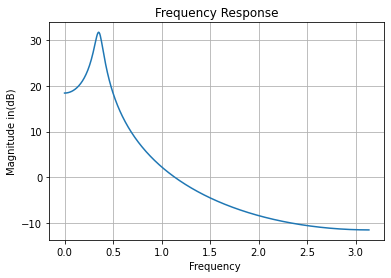

In [3]:
#As per given in question 
F1 = 900
B1 = 200
Fs = 16000

A, B = coeff(B1,F1,Fs)
W, H = signal.freqz(B, A)


fig1 = plt.figure()
plt.title("Frequency Response")
plt.plot(W, 20*np.log10(abs(H)))
plt.xlabel("Frequency ")
plt.ylabel("Magnitude in(dB)")
plt.grid()
plt.show()

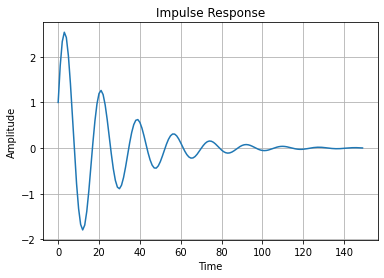

In [4]:
# Impulse response
time = range(150)
x1 = np.zeros(150)
# since impulse is input
x1[0]=1
y1 = fil_out(B1,F1,Fs,x1)

fig2 = plt.figure()
plt.title("Impulse Response")
plt.plot(time,y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Question 2

Excite the above resonator (“filter”) with a periodic source excitation of F0 = 160 Hz. You can approximate the source signal by a narrow-triangular pulse train. Compute the output of the source-filter system over the duration of 0.5 second using the difference equation implementation of the LTI system. Plot the time domain waveform over a few pitch periods so that you can observe waveform characteristics. Play out the 0.5 sec duration sound and comment on the sound quality.<br>

The input is approximated as a narrow triangular pulse with F0=160Hz and passed to the filter<br>
The time domain output and sound output is generated<br>

Observations:<br>
The audio output was a constant low pitched sound and had rough quality. It was difficult to interpret as it sounded like a noise<br>
The waveform is periodic<br>


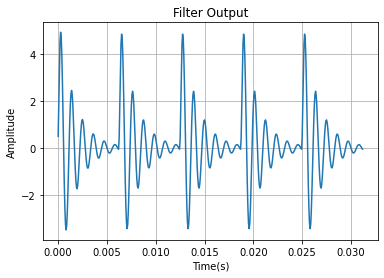

In [5]:

# as per given in question
F0 = 160    
Fs = 16000 
time_dur = 0.5
samples = int(time_dur * Fs)

def triangle_pulse(F0, Fs=16000, time_dur=0.5):
    samples = int(time_dur * Fs)
    pulses = int(time_dur * F0)
    strides = int(np.floor(Fs/F0))
    x = np.zeros(samples)
    for i in range(pulses):
        idx = i*strides
        x[idx] = 0.5
        x[idx+1] = 1
        x[idx+2] = 0.5

    return x


x = triangle_pulse(F0=160, Fs=16000)

y2 = fil_out(B1,F1,Fs,x)
time_rang = np.linspace(0, time_dur, samples)

fig3 = plt.figure()
plt.title("Filter Output")
plt.plot(time_rang[:500], y2[:500])
# plt.plot(time_rang[:200], x[:200])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

pulse = x #for use in Q3

# Sound output
display(IPython.display.Audio(y2, rate=Fs))

Question 3

Vary the parameters as indicated below; plot and comment on the differences in waveform and in sound quality for the different parameter combinations.<br>


The parts in Question 2 are repeated for 3 different sets of values for F0, F1, and B1

Observations:

a) Comparing 1st and 3rd waveform, we see difference in the pitch of the output. The pitch of 3rd waveform is higher than that of 1st one. This is because only the parameter F0 is different which relates to the vocal folds vibration which is responsible for the source excitation frequency. The max amplitude in both cases is the same. The articulatory phonation aspects of sound in both cases are same.<Br>
b) The 1st and 2nd cases differ in the parameters F1 and B1 of the formant resonator which relates to the vocal tract configuration. The 2nd waveform decays quickly as compared to the 1st waveform and 3rd waveform. This relates to the increase in bandwidth in 2nd case as compared to other cases.<Br>
c) The audio outputs in 1st and 3rd case sound similar while that in 2nd case sounds quite different than the two. Also in 1st case, it sounds more rough. 



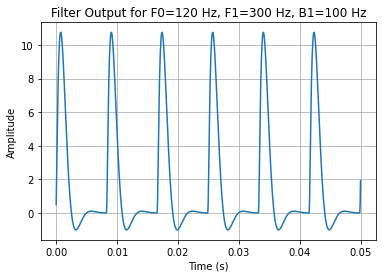

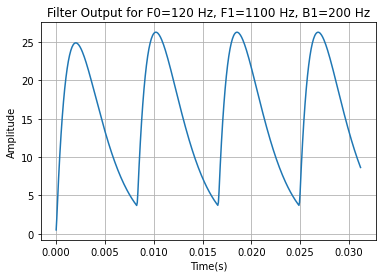

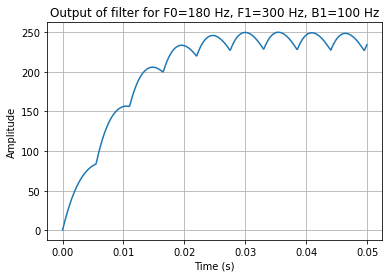

In [6]:
# Solution 3

# a)
F0 =120
F1 = 300
Fs = 16000
input1 = triangle_pulse(F0=120) 


y3 = fil_out(F1,B1,Fs,input1)

fig4 = plt.figure()
plt.title("Filter Output for F0={} Hz, F1={} Hz, B1={} Hz".format(120, 300, 100))
plt.plot(time_rang[:800], y3[:800])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Sound output
display(IPython.display.Audio(y3, rate=Fs))

# b) 
F0 = 120
F1 = 1100
Fs = 116000
input2 = triangle_pulse(F0=120)
y4 = fil_out(F1,B1,Fs,input2)

fig5 = plt.figure()
plt.title("Filter Output for F0={} Hz, F1={} Hz, B1={} Hz".format(120, 1100, 200))
plt.plot(time_rang[:500], y4[:500])
# plt.plot(time_rang[:200], x[:200])
plt.xlabel("Time(s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Sound output
display(IPython.display.Audio(y4, rate=Fs))

# c)
F0 = 180
F1 = 300
B1 = 100
input3 = triangle_pulse(F0=180)

y5 = fil_out(F1,B1,Fs,input3)

fig6 = plt.figure()
plt.title("Output of filter for F0={} Hz, F1={} Hz, B1={} Hz".format(180, 300, 100))
plt.plot(time_rang[:800], y5[:800])
# plt.plot(time_rang, y5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Sound output
display(IPython.display.Audio(y5, rate=Fs))



Question 4

In place of the simple single-resonance signal, synthesize the following more realistic vowel sounds at two distinct pitches (F0 = 120 Hz, F0 = 220 Hz). Keep the bandwidths constant at 100 Hz for all formants. Duration of sound: 0.5 sec. Comment on the sound quality across the different sounds. Plot a few periods of any 2 examples.<br>
Vowel F1, F2, F3<br>

/a/ 730, 1090, 2440<br>
/i/ 270, 2290, 3010<br>
/u/ 300, 870, 2240<br>

3 resonators with different formant frequencies are cascaded to get vowel sounds /a/, /i/, /u/.<br>


Observations:<br>
a) All the sounds can be distinguished properly as vowels /a/, /i/ and /u/. <br>

b) The sounds for F0=120Hz are of low pitch and sound little rough and noisy (like robotic/monotonic) while those for F0=220Hz are close to human speech but lack naturalness. 


In [7]:
# solution 4

def Vow(F0, F1, F2, F3, vowel_id):
  B1 = 100        #constant bandwidth
  Fs = 16000      #sampling frequency   


  inp_pulse = triangle_pulse(F0)    # triangular pulse excitation signal as input
  out = fil_out(B1,F1,Fs,inp_pulse)
  out = fil_out(B1,F2,Fs,out)
  out = fil_out(B1,F3,Fs,out)       # cascaded output

  samples = int(0.5 * Fs)   # taking duration=0.5
  time_rang= np.linspace(0, 0.5, samples)

  fig = plt.figure()
  plt.title("Filter Output for vowel {} and F0={} Hz".format(vowel_id, F0))
  plt.plot(time_rang[:450], out[:450])
  # plt.plot(time_rang[:200], x[:200])
  plt.xlabel("Time(s)")
  plt.ylabel("Amplitude")
  plt.grid()
  plt.show()

  # Sound output
  display(IPython.display.Audio(out, rate=Fs))


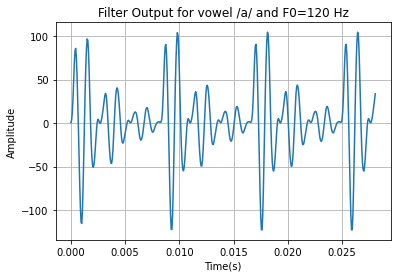

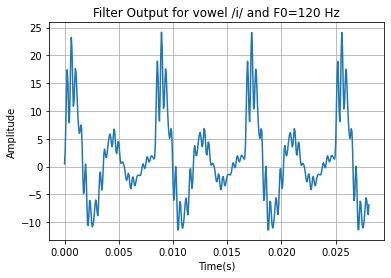

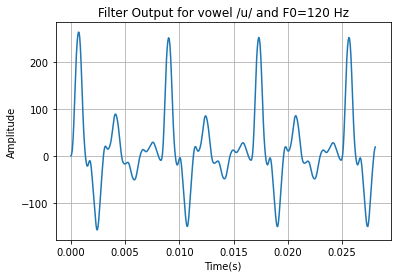

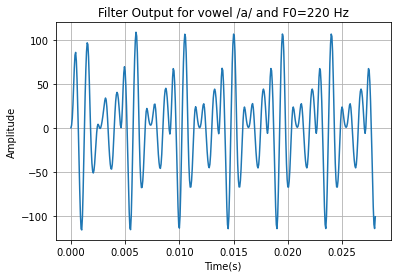

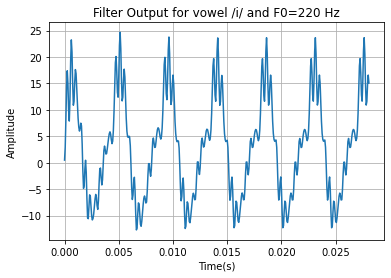

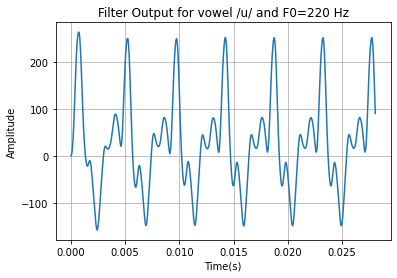

In [8]:
# /a/ For F0=120 
Vow(120, 730, 1090, 2440, "/a/")

# /i/ for F0=120
Vow(120, 270, 2290, 3010, '/i/')

# /u/ for F0=120
Vow(120, 300, 870, 2240, '/u/')

# /a/ For F0=220 
Vow(220, 730, 1090, 2440, '/a/')

# /i/ for F0=220
Vow(220, 270, 2290, 3010, '/i/')

# /u/ for F0=220
Vow(220, 300, 870, 2240, '/u/')